In [1]:
import numpy as np

In [2]:
# Hyper parameters
m = 5000
n = 2
lr = 0.01
epochs = 10000

In [3]:
def fun(X):
  # since the data is not standardized in the code, the coeffecients are taken 
  # in the range (0, 1)
  return 13 * ( X ** 2) / 17 +  7 * X / 19 + 5 / 11

In [4]:
def create_dataset():
    X = np.random.rand(m, 1)
    X2 = X * X

    Y = fun(X)

    arr = []
    arr.append(X2)
    arr.append(X)

    arr = np.array(arr)
    return arr.reshape((n,m)), Y.reshape((1,m))

In [5]:
x, y = create_dataset()

In [6]:
w = np.random.rand(n, 1)
b = np.random.rand(1)

In [7]:
def predict(train, weight, bias):
  return np.dot(weight.transpose(), train) + bias

In [8]:
def loss(y, y_hat):
  return np.sum((np.abs(y-y_hat) ** 7)) / m

In [9]:
def derivative(y, y_hat):
  return 7 * ((y_hat - y) ** 5) * np.abs(y_hat - y)

In [10]:
losses = []
for i in range(epochs):
  # forward prop
  y_hat = predict(x, w, b)

  # derivative for backprop
  dz =  derivative(y, y_hat)

  # printing loss every 50 epochs
  if i % 500 == 0:
    losses.append(loss(y, y_hat))
    print("Loss at epoch " + str(i+1) + " is " + str(loss(y, y_hat)))

  dw = np.dot(x, dz.transpose()) / m
  db = np.sum(dz) / m

  w -= lr * dw
  b -= lr * db

Loss at epoch 1 is 0.0006695313619962817
Loss at epoch 501 is 0.00024955864329147964
Loss at epoch 1001 is 0.00014271654941126568
Loss at epoch 1501 is 9.641790246656347e-05
Loss at epoch 2001 is 7.124198698153744e-05
Loss at epoch 2501 is 5.5675547656692556e-05
Loss at epoch 3001 is 4.521602504379965e-05
Loss at epoch 3501 is 3.776532448026676e-05
Loss at epoch 4001 is 3.2222928964774114e-05
Loss at epoch 4501 is 2.795985491824943e-05
Loss at epoch 5001 is 2.4592367245731768e-05
Loss at epoch 5501 is 2.1874001767317203e-05
Loss at epoch 6001 is 1.963973693283312e-05
Loss at epoch 6501 is 1.77752181377536e-05
Loss at epoch 7001 is 1.6198878559417487e-05
Loss at epoch 7501 is 1.485108720312237e-05
Loss at epoch 8001 is 1.3687312920628914e-05
Loss at epoch 8501 is 1.2673678533896527e-05
Loss at epoch 9001 is 1.1783988063844556e-05
Loss at epoch 9501 is 1.0997689988782684e-05


In [11]:
print(w)

[[0.32014739]
 [0.60454505]]


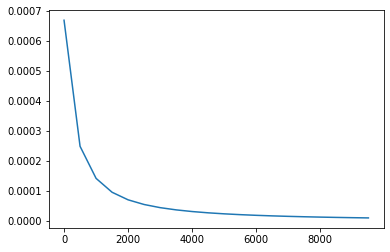

In [12]:
epocs_x = [i for i in range(1, epochs, 500)]
import matplotlib.pyplot as plt
plt.plot(epocs_x, losses)

In [13]:
# create test data for the model
test_x, test_y = create_dataset()

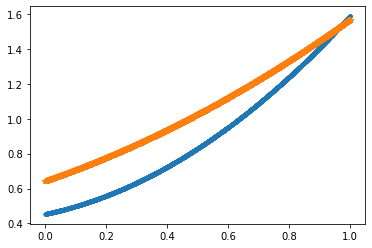

In [14]:
# Plotting the ground truth values vs model predicted values
# Yellow line denotes the predictions, blue line denotes the ground truth
plt.plot(test_x[1], test_y.reshape(m), '.',
         test_x[1], predict(test_x, w, b).reshape(m), '*')